In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: xlabel='price', ylabel='area'>

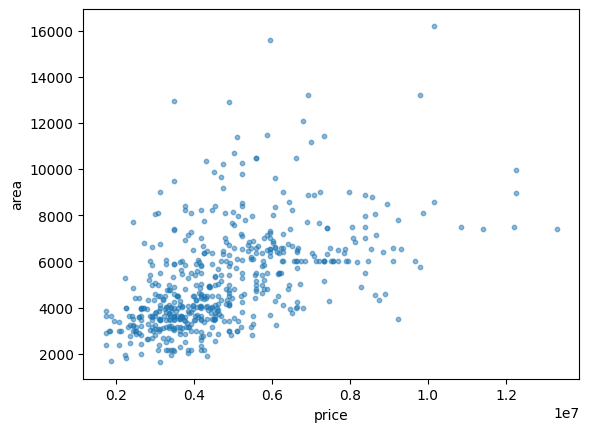

In [9]:
df.plot(kind='scatter',x= 'price',y = 'area',s =10,alpha = 0.5)

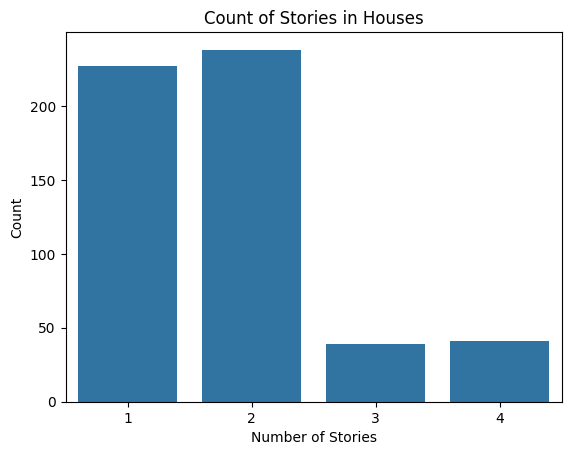

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='stories')
plt.title('Count of Stories in Houses')
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.show()

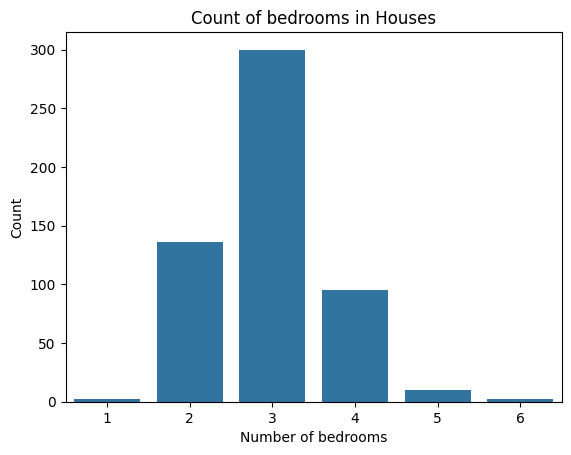

In [15]:
sns.countplot(data=df, x='bedrooms')
plt.title('Count of bedrooms in Houses')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')
plt.show()

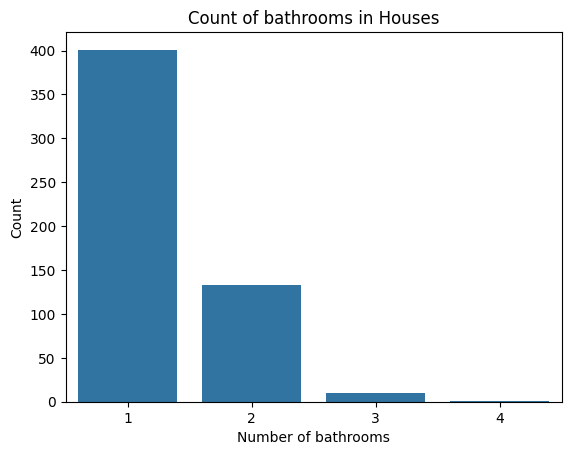

In [16]:
sns.countplot(data=df, x='bathrooms')
plt.title('Count of bathrooms in Houses')
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

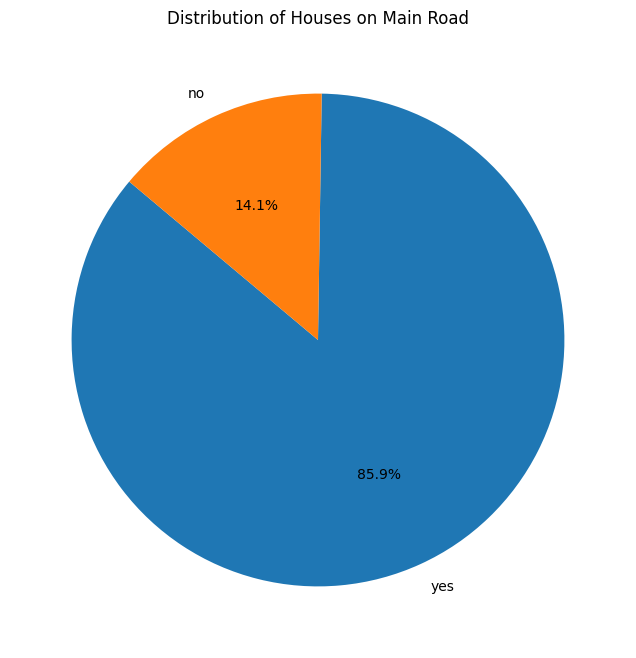

In [17]:
mainroad_counts = df['mainroad'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mainroad_counts, labels=mainroad_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Houses on Main Road')
plt.show()

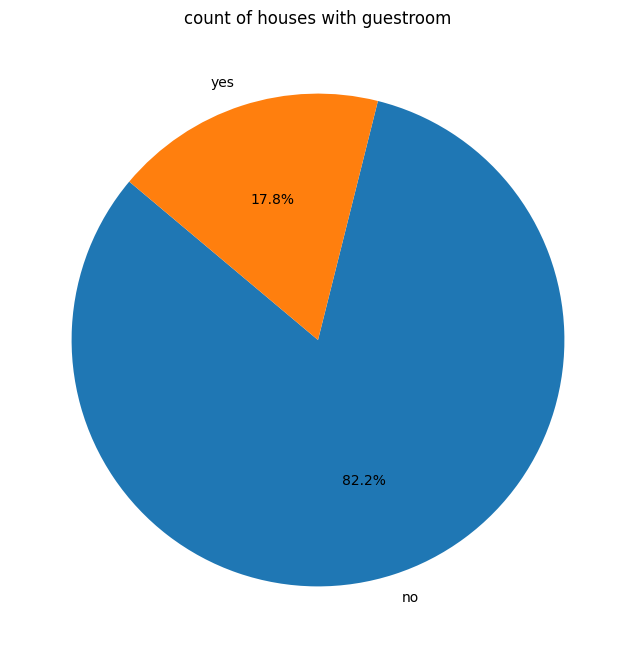

In [18]:
guestroom_counts = df['guestroom'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(guestroom_counts, labels=guestroom_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('count of houses with guestroom')
plt.show()

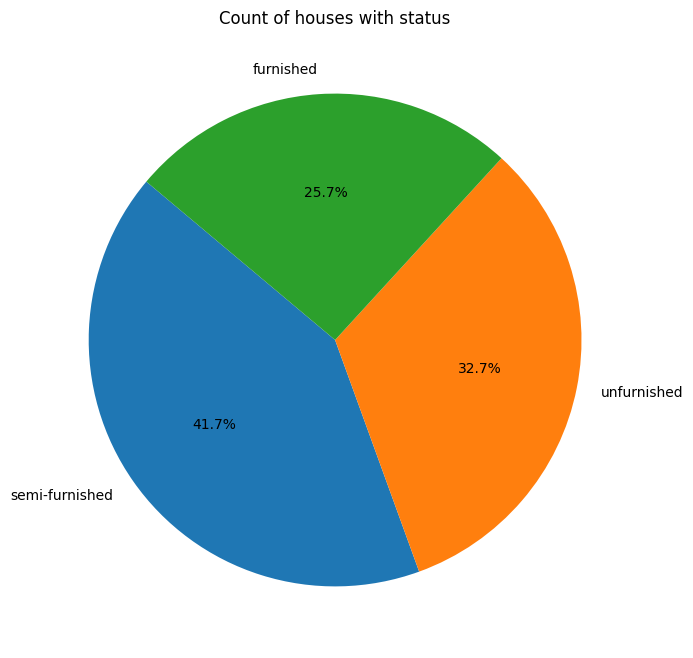

In [19]:
furnishingstatus_counts = df['furnishingstatus'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(furnishingstatus_counts, labels=furnishingstatus_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of houses with status')
plt.show()

Text(0, 0.5, 'count')

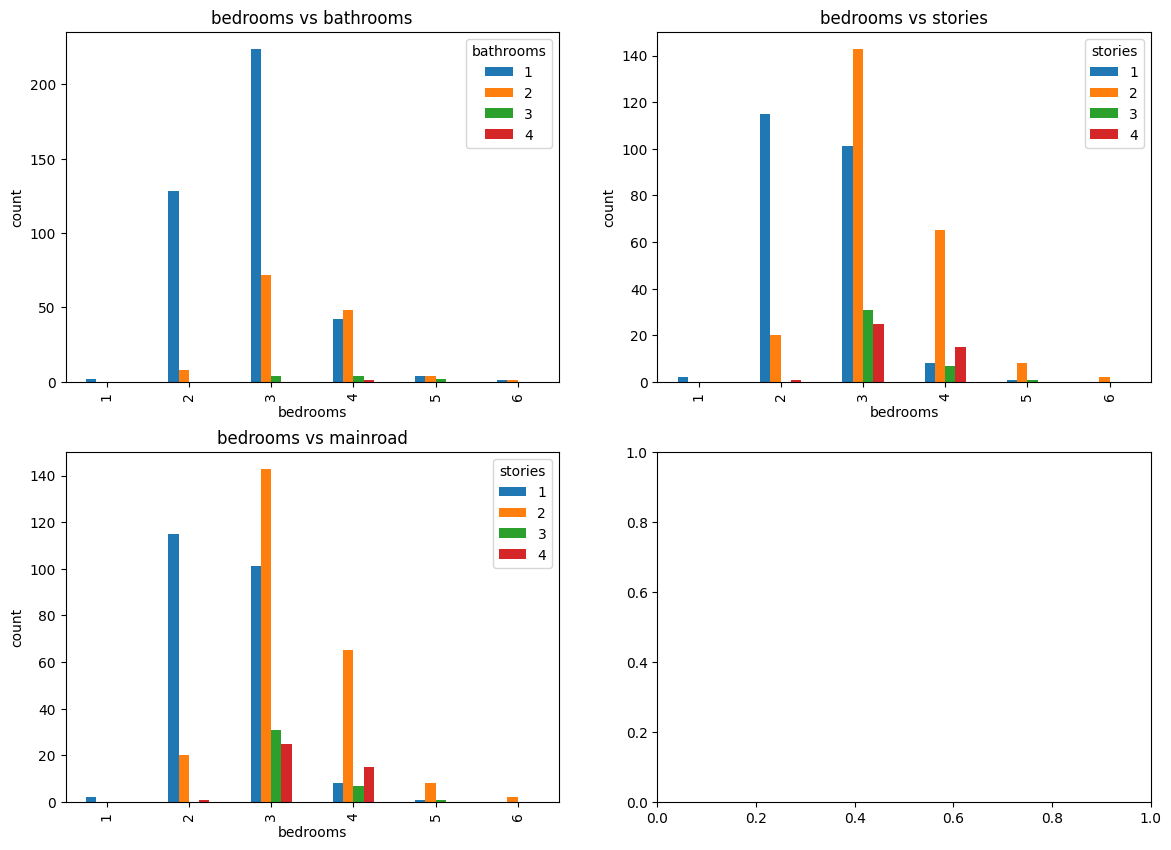

In [26]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
bedrooms_bathrooms= pd.crosstab(df['bedrooms'],df['bathrooms'])
bedrooms_bathrooms.plot(kind = 'bar',ax=axes[0,0])
axes[0,0].set_title('bedrooms vs bathrooms')
axes[0,0].set_xlabel('bedrooms')
axes[0,0].set_ylabel('count')

bedrooms_stories= pd.crosstab(df['bedrooms'],df['stories'])
bedrooms_stories.plot(kind = 'bar',ax=axes[0,1])
axes[0,1].set_title('bedrooms vs stories')
axes[0,1].set_xlabel('bedrooms')
axes[0,1].set_ylabel('count')

bedrooms_mainroad= pd.crosstab(df['bedrooms'],df['mainroad'])
bedrooms_stories.plot(kind = 'bar',ax=axes[1,0])
axes[1,0].set_title('bedrooms vs mainroad')
axes[1,0].set_xlabel('bedrooms')
axes[1,0].set_ylabel('count')





In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoding_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in encoding_col:
    df[col] = encoder.fit_transform(df[col])



In [36]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_mapped
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [42]:
x = df.drop(columns =['price'], axis=1)
y = df['price']


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))



In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # You can try RandomForestRegressor() or other models
model.fit(x_train, y_train)

LinearRegression()

In [52]:
y_prediction = model.predict(x_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error_data = mean_absolute_error(y_test, y_prediction)
mean_squared_error_data = mean_squared_error(y_test, y_prediction)

In [55]:
mean_absolute_error_data
mean_squared_error_data

0.013281243729270748

In [56]:
from sklearn.metrics import r2_score
import numpy as np
accuracy = r2_score(y_test, y_prediction)
print("R² Score (Accuracy):", accuracy)


R² Score (Accuracy): 0.6494754192267791
